# DuPont Time-series analysis

DuPont analysis is a framework that decomposes ROE into three component: Net profit margin, total asset turnover, and leverage. 

This analysis originated from DuPont, innovated by Donaldson Brown in 1914. Nowadays, this framework is widely used to determine the operational efficiency of two similar firms. Nevertheless, if we take one step back, DuPont analysis still provide us with a big picture of the performance of different companies.



In [1]:
from function.func import Dupont_analysis
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime
from tqdm import tqdm
import seaborn as sns
import time
from scipy import stats
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

/opt/anaconda3/envs/stock/lib/python3.10/site-packages/requests/__init__.py:102: RequestsDependencyWarning: urllib3 (1.26.9) or chardet (5.1.0)/charset_normalizer (2.0.4) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({})/charset_normalizer ({}) doesn't match a supported "


## Dupont analysis for a individual stock 

In [2]:
stock_id = '2330'
Du_2330 = Dupont_analysis(stock_id)

In [3]:
Du_2330.head(5)

,stock id,quarter,profit_margin,total_asset_turnover,financial_leverage,ROE
0,2330,2013-03-31,0.297808,0.125048,1.381163,5.143510
0,2330,2013-06-30,0.332046,0.133249,1.567715,6.936342
0,2330,2013-09-30,0.319447,0.138065,1.464284,6.458142
0,2330,2013-12-31,0.307170,0.115439,1.489847,5.282903
0,2330,2014-03-31,0.322813,0.114122,1.446261,5.328049


## Normal distribution test for ROE

As being **normal distribution**, a **confidence interval** is able to be made telling the certainty of a company's performance. Therefore, we implement


(1) normaltest from [scipy.stats.normaltest](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.normaltest.html), and 

(2) [qqplot](https://data.library.virginia.edu/understanding-q-q-plots/)

at this step. 

s^2 + k^2:1.57743663656056,
p-value:0.45442685278661166


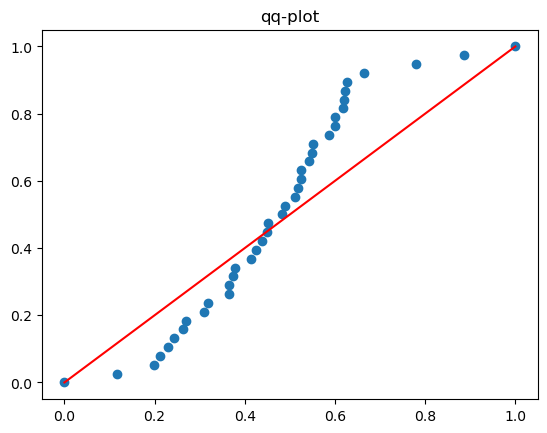

In [4]:
norm_roe = (Du_2330.ROE-min(Du_2330.ROE))/(max(Du_2330.ROE)-min(Du_2330.ROE))
k2, p = stats.normaltest(norm_roe)
print(f's^2 + k^2:{k2},\np-value:{p}')
lineStart, lineEnd = 0,1
plt.figure()
plt.scatter(sorted(norm_roe),np.linspace(0,1,len(norm_roe)))
plt.title(label='qq-plot')
plt.plot([lineStart, lineEnd], [lineStart, lineEnd], color = 'r')
#plt.savefig(f'img/qqplot_ROE_2330.png',dpi=300)

If so, we can further calculate `mean` and `upper & lower CI`.

In [5]:
pm_mean = np.mean(Du_2330.ROE)
upperCI,lowerCI = pm_mean+2*np.std(Du_2330.ROE), pm_mean-2*np.std(Du_2330.ROE)

## Visualisation of  DuPont analysis

We make a time-series plots combining a

(1) line graph: trend of ROE's 

(2) bar graph: trend of Profit margin, Total asset turnover and Financial leverage 

In [6]:
quarters = {'Q1':'03-31','Q2':'06-30','Q3':'09-30','Q4':'12-31'}

In [7]:
Dupont_plot = Du_2330.melt(id_vars='quarter')
for i in range(len(Dupont_plot)):
    for key,value in quarters.items():
        if Dupont_plot['quarter'][i][-5:] == value:    
            Dupont_plot['quarter'][i] = Dupont_plot['quarter'][i][:4] + '\n' +  key
bar = Dupont_plot[Dupont_plot['variable'] != 'ROE'][Dupont_plot['variable'] != 'stock id']
line = Dupont_plot[Dupont_plot['variable'] == 'ROE']

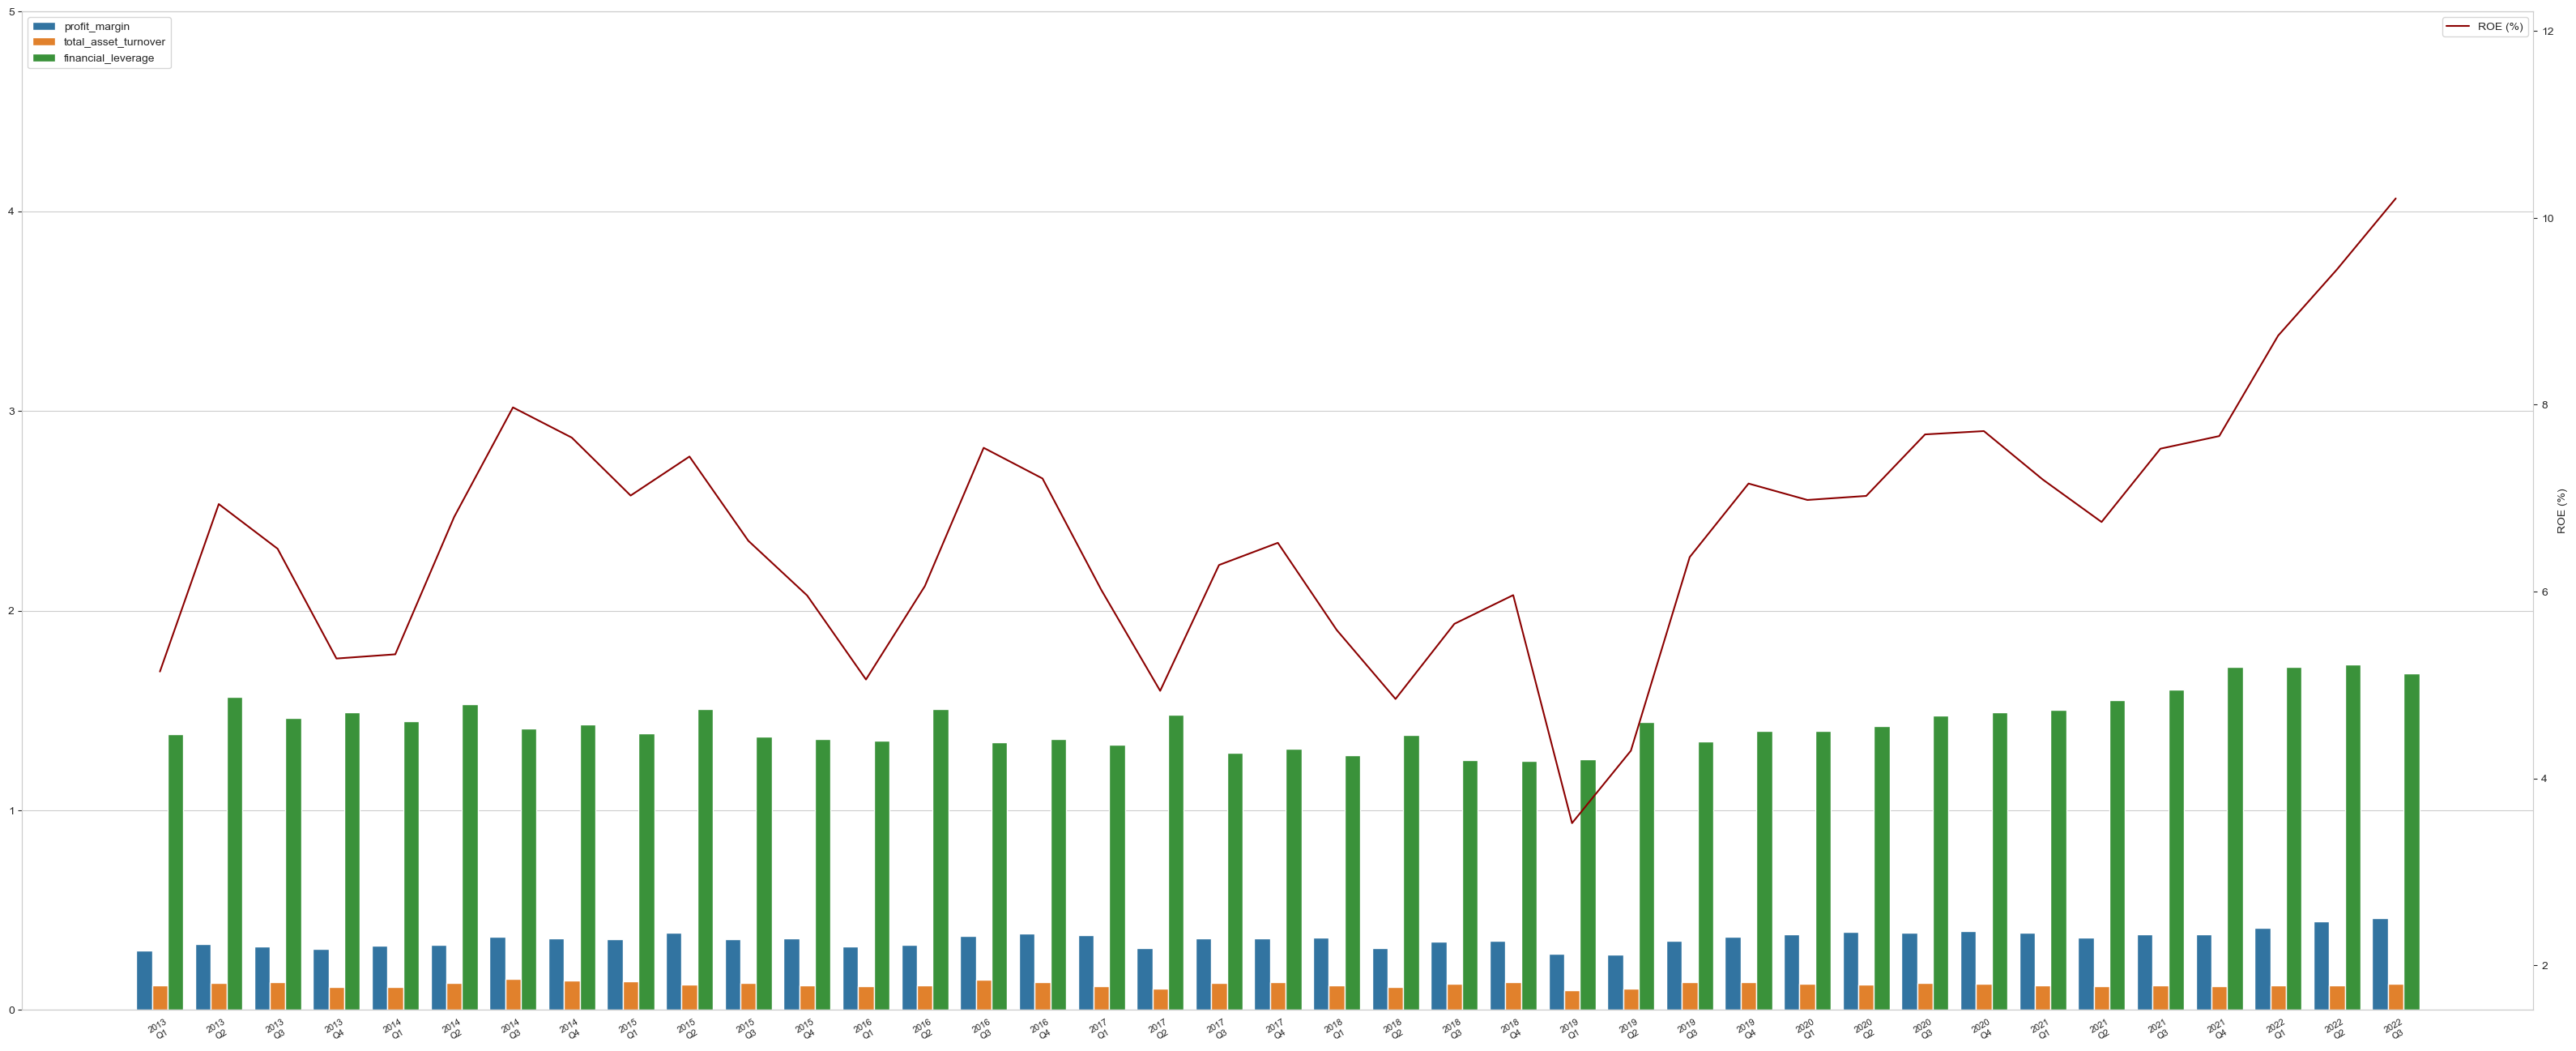

In [8]:
sns.set_style("whitegrid")
# plot line graph on axis #1
plt.figure(figsize=(40,16))
plt.xticks(fontsize=8,rotation=30)
ax1 = sns.barplot(
    x='quarter',
    y='value',
    hue='variable',
    data=bar, 
)
ax1.set_ylabel('')
ax1.set_xlabel('')
ax1.legend(loc="upper left")
ax1.set_ylim(round(min(bar.value)-0.5), round(max(bar.value)+3.5))
# set up the 2nd axis
ax2 = ax1.twinx()
# plot bar graph on axis #2
sns.lineplot(
    x='quarter', 
    y='value',
    data=line, 
    color='darkred', 
    ax = ax2       # Pre-existing axes for the plot
)
ax2.grid(b=False) # turn off grid #2
ax2.set_ylabel('ROE (%)')
ax2.set_ylim(min(line.value)-2, max(line.value)+2)
ax2.legend(['ROE (%)'], loc="upper right")
#plt.savefig(f'img/Dupont_trend_2330.png',dpi=300)
plt.show()

## Comparison of Dupont anaylsis result among companies in ETF0050 lists

### Input

A list of 50 top market capitalization companies: `0050-20220106.csv`. 


### Output

1. A list of raw historical Dupont analyses throughout candidate stocks: `dupont_analysis_raw.csv`

2. A list of statistics result of Dupont analyses thoughtout candidate stocks: `dupont_analysis_stat.csv`



In [9]:
today = datetime.today().strftime('%Y-%m-%d')

# import ETF0050 list
eft0050 = pd.read_csv('0050-20220106.csv',sep=';',header=1)
candidate_stocks = eft0050['Stock ID'].apply(lambda x: str(x)).values

# concatenate a list with historical Dupont analyses throughout candidate stocks
df = pd.DataFrame()
for stock in tqdm(candidate_stocks):
    try:
        df_dup = Dupont_analysis(stock)
        df = pd.concat([df,df_dup],axis=0)
    except IndexError or JSONDecodeError:
        time.sleep(1)
        print(f'not sufficient data for {stock}')

 14%|██████▏                                     | 7/50 [01:11<06:23,  8.91s/it]

not sufficient data for 2881


 18%|███████▉                                    | 9/50 [01:27<05:44,  8.41s/it]

not sufficient data for 2891


 22%|█████████▍                                 | 11/50 [02:29<12:11, 18.75s/it]

not sufficient data for 2882


 24%|██████████▎                                | 12/50 [02:36<09:30, 15.01s/it]

not sufficient data for 2886


 30%|████████████▉                              | 15/50 [04:11<13:00, 22.31s/it]

not sufficient data for 2884


 36%|███████████████▍                           | 18/50 [07:49<27:37, 51.79s/it]

not sufficient data for 2892


 38%|████████████████▎                          | 19/50 [08:14<22:36, 43.75s/it]

not sufficient data for 5880


 40%|█████████████████▏                         | 20/50 [08:19<15:59, 31.97s/it]

not sufficient data for 2885


 44%|██████████████████▉                        | 22/50 [08:36<09:16, 19.86s/it]

not sufficient data for 2880


 50%|█████████████████████▌                     | 25/50 [10:00<10:01, 24.05s/it]

not sufficient data for 2883


 62%|██████████████████████████▋                | 31/50 [14:22<13:27, 42.51s/it]

not sufficient data for 2890


 64%|███████████████████████████▌               | 32/50 [14:31<09:47, 32.65s/it]

not sufficient data for 2887


 70%|██████████████████████████████             | 35/50 [17:42<14:01, 56.09s/it]

not sufficient data for 5876


 86%|████████████████████████████████████▉      | 43/50 [20:48<02:30, 21.56s/it]

not sufficient data for 2801


100%|███████████████████████████████████████████| 50/50 [22:53<00:00, 27.48s/it]


In [10]:
# produce raw dupont analysis dataframe
df_du = df.sort_values('ROE',ascending=False).reset_index(drop=True)
df_du.to_csv(f'dupont_analysis_raw_{today}.csv',index=False)

# aggregated dupont analysis dataframe
df_aggr = df_du.groupby(by='stock id').mean()
df_std = df_du.groupby(by='stock id').std()['ROE']
df_aggr['UpperCI ROE'] = df_aggr['ROE'] + 2*df_std
df_aggr['LowerCI ROE'] = df_aggr['ROE'] - 2*df_std
df_aggr.sort_values('ROE',ascending=False).to_csv(f'dupont_analysis_stat_{today}.csv')

In [11]:
df_du.head(5)

,stock id,quarter,profit_margin,total_asset_turnover,financial_leverage,ROE
0,2408,2013-06-30,0.122282,0.140829,24.501145,42.192991
1,2609,2021-03-31,0.394765,0.298210,3.344350,39.370712
2,2408,2013-12-31,0.316485,0.133271,9.327890,39.343399
3,2912,2017-12-31,0.408842,0.398007,2.350692,38.250953
4,2408,2014-03-31,0.519174,0.122449,5.941844,37.773755


In [12]:
df_aggr.head(5)

,profit_margin,total_asset_turnover,financial_leverage,ROE,UpperCI ROE,LowerCI ROE
stock id,,,,,,
1101,0.140403,0.085363,1.834248,2.239022,4.688957,-0.210912
1216,0.066518,0.256818,2.650230,4.361753,9.796316,-1.072811
1301,0.174675,0.115381,1.473116,2.947445,6.097652,-0.202761
1303,0.131395,0.141028,1.612789,3.020844,6.253721,-0.212032
1326,0.102191,0.160980,1.488651,2.375495,5.432475,-0.681484
